# Titanic Survivor Model

### Import Libraries

In [82]:
# Data Manipulation
import pandas as pd
# Numerical Manipulation
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
import sklearn
# Stratify Data Procedure
from sklearn.model_selection import StratifiedShuffleSplit
# Mix & Transform Code Economy
from sklearn.base import BaseEstimator, TransformerMixin
# Imputer Procedure
from sklearn.impute import SimpleImputer
# One Hot Encoder
from sklearn.preprocessing import OneHotEncoder
# Pipelines
from sklearn.pipeline import Pipeline
# 
from sklearn.preprocessing import StandardScaler

### Exploratory Steps

In [63]:
# Loading Dataset
titanic_data = pd.read_csv('titanic/train.csv')

In [64]:
# Getting first approach
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [65]:
# Range of Individual Values
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/var/folders/wh/l_q69dcj75z0c82jy8ry71f40000gn/T/ipykernel_14098/814864757.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_data.corr(), cmap="viridis_r")


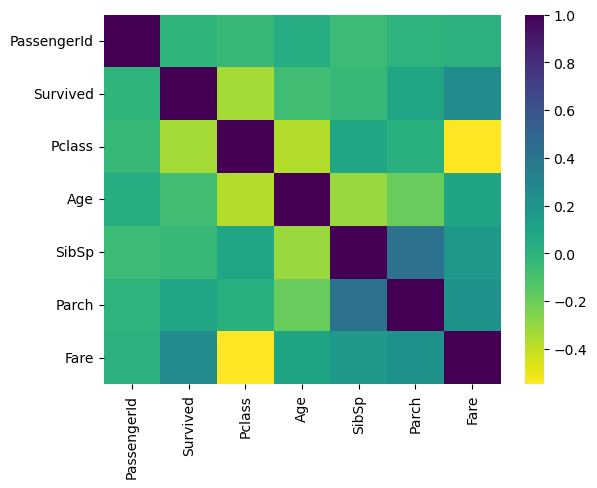

In [66]:
# Retrieving features extra-info through Correlations

# Correlation HeatMap
sns.heatmap(titanic_data.corr(), cmap="viridis_r")
plt.show()

## Stratified Model Procedure

## Data Preprocessing for Titanic Dataset

### Handling String Features
In the Titanic dataset, some features are represented as strings which do not correlate well numerically. For example, the `sex` column contains values like `male` or `female`.

### Stratified Shuffle Split
To address potential data skewness and ensure uniformity in the dataset, a "Stratified Shuffle Split" is used. This method is preferred to maintain a balanced representation of categories. However, a regular split of 80% training and 20% testing data can also be opted for, depending on the specific analysis requirements.

In [67]:
# Setting the Stratifier
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
# Features equally distributed
for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

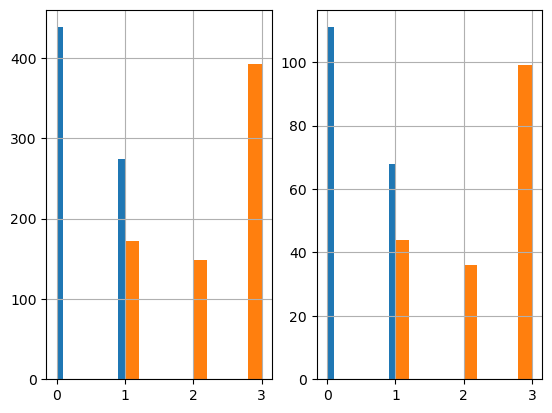

In [68]:
plt.subplot(1, 2, 1)
# Let's check the survided & Pclass distribution on Stratified Train set
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

# Let's check the survided & Pclass distribution on Stratified Test set
plt.subplot(1, 2, 2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show()

In [69]:
# Let's know check on any Missing Values
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 606 to 92
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          567 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        165 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


## Data Analysis and Imputation in Titanic Dataset

#### Identifying Missing Values
Upon stratifying and examining the dataset, it was observed that there is a significant amount of missing information in the `Age` column. Given the potential relevance of age in prediction models, addressing these missing values is crucial.

#### Imputation of 'Age'
To counteract the lack of 'Age' data, an "imputation" procedure is implemented. This approach is intended to provide more accurate predictions by estimating missing age values rather than omitting them or filling with basic statistics like mean or median.

#### Handling 'Cabin' Data
The `Cabin` column also presented a substantial amount of missing information. However, upon further analysis, it was determined that 'Cabin' does not significantly correlate with the overall data behavior. Consequently, the relevance of the `Cabin` data is considered minimal for the predictive models.

#### Implementation Using Estimators
The imputation for the `Age` and the decision to discard the `Cabin` data will be operationalized using appropriate estimators within our predictive modeling framework.

In [70]:
# Setting Imputers

class AgeImputer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Setting Strategy
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

### One Hot Encoding

In [71]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Setting Encoder
        encoder = OneHotEncoder()
        # Matrix Embarked Encoded
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        
        # For Embarked
        column_names = ["C", "Q", "S", "N"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        
        # Matrix Sex Encoded
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        
        #
        column_names = ["Female", "Male"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        return X

### Dropping No-Significant Features

In [77]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")

### Pipelines

In [78]:
# Setting Pipeline
pipeline = Pipeline([("ageimputer", AgeImputer()),
                     ("featureencoder", FeatureEncoder()),
                     ("featuredropper", FeatureDropper())])

In [79]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [80]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Female,Male
606,607,0,3,30.000000,0,0,7.8958,0.0,0.0,1.0,0.0,1.0
776,777,0,3,29.578342,0,0,7.7500,0.0,1.0,0.0,0.0,1.0
90,91,0,3,29.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
212,213,0,3,22.000000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
437,438,1,2,24.000000,2,3,18.7500,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
545,546,0,1,64.000000,0,0,26.0000,0.0,0.0,1.0,0.0,1.0
361,362,0,2,29.000000,1,0,27.7208,1.0,0.0,0.0,0.0,1.0
113,114,0,3,20.000000,1,0,9.8250,0.0,0.0,1.0,1.0,0.0
673,674,1,2,31.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0


In [81]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 606 to 92
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   Q            712 non-null    float64
 9   S            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


### Standard Scaling

In [83]:
# Setting Scaler
scaler = StandardScaler()

X = strat_train_set.drop(['Survived'], axis=1)
y = strat_train_set['Survived']

X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [84]:
X_data

array([[ 6.47149058e-01,  8.27893418e-01,  3.22309340e-02, ...,
         6.20656111e-01, -7.35612358e-01,  7.35612358e-01],
       [ 1.31414715e+00,  8.27893418e-01, -5.43128893e-16, ...,
        -1.61119819e+00, -7.35612358e-01,  7.35612358e-01],
       [-1.37738633e+00,  8.27893418e-01, -4.42076622e-02, ...,
         6.20656111e-01, -7.35612358e-01,  7.35612358e-01],
       ...,
       [-1.28714541e+00,  8.27893418e-01, -7.32155028e-01, ...,
         6.20656111e-01,  1.35941164e+00, -1.35941164e+00],
       [ 9.10024776e-01, -3.70196244e-01,  1.08669530e-01, ...,
         6.20656111e-01, -7.35612358e-01,  7.35612358e-01],
       [-1.36953929e+00, -1.56828591e+00,  1.25524847e+00, ...,
         6.20656111e-01, -7.35612358e-01,  7.35612358e-01]])

### Train & Model Selection